In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy

In [2]:
print(os.listdir(r"C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1\natural3"))


['test', 'train']


In [3]:
#Start by creating empty lists.
train_images = []
train_labels = [] 

In [4]:
for directory_path in glob.glob(r"C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (300, 300)) #Resize images
        train_images.append(img)
        train_labels.append(label)

cloudy
C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train\cloudy\cloudy (1).jpg
C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train\cloudy\cloudy (10).jpg
C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train\cloudy\cloudy (100).jpg
C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train\cloudy\cloudy (101).jpg
C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train\cloudy\cloudy (102).jpg
C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train\cloudy\cloudy (103).jpg
C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train\cloudy\cloudy (104).jpg
C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train\cloudy\cloudy (105).jpg
C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train\cloudy\cloudy (106).jpg
C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train\cloudy\cloudy (107).jpg
C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/train\cloudy\cloudy (108).jpg
C:\Users\Vedant Y

In [5]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
print(train_images)
print(train_labels)

[[[202 201 201 ... 224 226 228]
  [201 201 201 ... 225 228 230]
  [201 200 200 ... 228 230 231]
  ...
  [ 46  45  44 ... 104 104 103]
  [ 44  43  41 ... 106 106 105]
  [ 43  42  40 ... 103 102 101]]

 [[ 27  27  27 ...  29  29  29]
  [ 27  27  27 ...  29  29  29]
  [ 27  27  27 ...  29  29  29]
  ...
  [196 196 198 ...   0   0   0]
  [194 195 196 ...   0   0   0]
  [195 195 197 ...   0   0   0]]

 [[ 78  78  77 ... 126 114 109]
  [ 80  80  80 ... 124 113 108]
  [ 83  83  83 ... 123 114 110]
  ...
  [ 70  70  70 ... 102 108 113]
  [ 66  66  66 ...  98 100 104]
  [ 64  64  64 ...  97  96  96]]

 ...

 [[ 50  28  25 ...  88  89  88]
  [ 48  27  23 ...  90  91  90]
  [ 47  27  22 ...  88  88  86]
  ...
  [193 194 191 ... 190 190 191]
  [190 192 192 ... 166 165 164]
  [186 191 194 ... 192 189 184]]

 [[ 64 151 137 ...  48  41  35]
  [ 78 138 120 ...  52  42  39]
  [114 141 107 ...  62  47  41]
  ...
  [ 64  55  49 ... 165 155 165]
  [ 52  60  62 ... 108  86  82]
  [ 47  78  88 ...  78  65  

In [7]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = []

In [8]:
for directory_path in glob.glob(r"C:\Users\Vedant Yawalkar\Desktop\esdlabs\CV_GLCM1/natural3/test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (300, 300))
        test_images.append(img)
        test_labels.append(fruit_label)

In [9]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [10]:
print(test_images)
print(test_labels)

[[[ 40  41  43 ... 112 120 123]
  [ 39  41  43 ... 114 122 124]
  [ 39  41  43 ... 118 124 126]
  ...
  [ 48  48  47 ...  44  40  37]
  [ 47  46  46 ...  47  42  39]
  [ 45  44  44 ...  47  42  39]]

 [[224 226 229 ... 111 119 126]
  [226 227 230 ... 111 117 123]
  [228 229 231 ... 112 116 120]
  ...
  [197 189 186 ...  54  54  54]
  [197 196 195 ...  55  55  55]
  [187 192 190 ...  58  58  58]]

 [[239 242 242 ...  25  24  24]
  [239 241 240 ...  25  24  24]
  [237 239 239 ...  25  24  24]
  ...
  [112 109 108 ...  43  44  47]
  [118 108 103 ...  31  30  35]
  [109 106 110 ...  35  33  41]]

 ...

 [[ 80 119  49 ... 145  64 194]
  [ 78  87  78 ... 154  56 165]
  [ 55  78  67 ...  76  35 121]
  ...
  [ 25  25  26 ...  29  29  28]
  [ 27  28  28 ...  27  26  24]
  [ 28  29  29 ...  23  21  18]]

 [[143 144 146 ... 162 162 161]
  [143 145 146 ... 163 162 162]
  [144 145 147 ... 163 163 163]
  ...
  [ 25  25  25 ...  32  31  31]
  [ 24  25  25 ...  31  30  31]
  [ 24  24  25 ...  29  28  

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [12]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [13]:
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
                
         #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [2], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = greycomatrix(img, [3], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [4], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        GLCM6 = greycomatrix(img, [5], [3*np.pi/2])       
        GLCM_Energy6 = greycoprops(GLCM6, 'energy')[0]
        df['Energy'] = GLCM_Energy6
        GLCM_corr6 = greycoprops(GLCM6, 'correlation')[0]
        df['Corr'] = GLCM_corr6       
        GLCM_diss6 = greycoprops(GLCM6, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss6       
        GLCM_hom6 = greycoprops(GLCM6, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom6      
        GLCM_contr6 = greycoprops(GLCM6, 'contrast')[0]
        df['Contrast'] = GLCM_contr6
        
        GLCM7 = greycomatrix(img, [8], [3*np.pi/4])       
        GLCM_Energy7 = greycoprops(GLCM7, 'energy')[0]
        df['Energy'] = GLCM_Energy7
        GLCM_corr7 = greycoprops(GLCM7, 'correlation')[0]
        df['Corr'] = GLCM_corr7       
        GLCM_diss7 = greycoprops(GLCM7, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss7       
        GLCM_hom7 = greycoprops(GLCM7, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom7      
        GLCM_contr7 = greycoprops(GLCM7, 'contrast')[0]
        df['Contrast'] = GLCM_contr7
        
        GLCM8 = greycomatrix(img, [1], [3*np.pi/2])       
        GLCM_Energy8 = greycoprops(GLCM8, 'energy')[0]
        df['Energy'] = GLCM_Energy8
        GLCM_corr8 = greycoprops(GLCM8, 'correlation')[0]
        df['Corr'] = GLCM_corr8       
        GLCM_diss8 = greycoprops(GLCM8, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss8       
        GLCM_hom8 = greycoprops(GLCM8, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom8      
        GLCM_contr8 = greycoprops(GLCM8, 'contrast')[0]
        df['Contrast'] = GLCM_contr8
        
        GLCM9 = greycomatrix(img, [1], [3*np.pi/2])       
        GLCM_Energy9 = greycoprops(GLCM9, 'energy')[0]
        df['Energy'] = GLCM_Energy9
        GLCM_corr9 = greycoprops(GLCM9, 'correlation')[0]
        df['Corr'] = GLCM_corr9       
        GLCM_diss9 = greycoprops(GLCM9, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss9       
        GLCM_hom9 = greycoprops(GLCM9, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom9       
        GLCM_contr9 = greycoprops(GLCM9, 'contrast')[0]
        df['Contrast'] = GLCM_contr9
        
        
        #Add more filters as needed
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy
        
        print(GLCM_Energy,GLCM_corr,GLCM_diss,GLCM_hom,GLCM_contr,entropy)

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [14]:
image_features = feature_extractor(x_train)
X_for_ML =image_features


[0.02146729] [0.98213707] [5.85875839] [0.30147856] [142.98855705] 7.771232396656386
[0.01986694] [0.99373829] [4.14044743] [0.26165192] [38.22706935] 7.643214886255239
[0.018036] [0.98489455] [5.45177852] [0.25251341] [82.80670022] 7.692348302932202
[0.01908504] [0.96637336] [6.06197987] [0.22823558] [161.31162192] 7.531704947437241
[0.02045936] [0.99312868] [3.90995526] [0.26699606] [34.92796421] 7.550841807095226
[0.02264618] [0.96799636] [6.65119687] [0.30211509] [150.01495526] 7.581511405364351
[0.01920765] [0.97782568] [7.45530201] [0.24113674] [174.70411633] 7.788351825748465
[0.02451105] [0.99328018] [3.62255034] [0.34558042] [41.96214765] 7.614633831825406
[0.02494838] [0.99236282] [4.00352349] [0.33435161] [62.02895973] 7.765907842212129
[0.02938073] [0.99651689] [2.54813199] [0.41286616] [20.9908613] 7.571479963072436
[0.03370951] [0.99749952] [2.32974273] [0.41984062] [17.84276286] 7.477787520944
[0.03422503] [0.99331597] [2.60564877] [0.39279618] [21.24381432] 6.9199830988

In [15]:
X_for_ML

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,Corr4,Diss_sim4,Homogen4,Contrast4,Energy5,Corr5,Diss_sim5,Homogen5,Contrast5,Entropy
0,0.025187,0.986346,5.061472,0.343004,109.319331,0.018841,0.974079,7.447868,0.248023,207.554714,...,0.960029,9.976837,0.200685,320.075323,0.015661,0.947100,12.068716,0.151520,424.534505,7.771232
0,0.026790,0.997565,2.402664,0.397048,14.880970,0.016909,0.987791,5.861414,0.191959,74.414254,...,0.985267,6.449056,0.177608,89.605536,0.015031,0.971809,8.474730,0.144075,171.949977,7.643215
0,0.019674,0.992924,4.013913,0.271456,38.846711,0.015606,0.972940,7.442896,0.198312,148.278070,...,0.967973,8.588059,0.154588,175.673258,0.011081,0.923229,13.973559,0.087336,421.730068,7.692348
0,0.023984,0.986724,3.683969,0.339793,63.691884,0.016547,0.947482,8.100696,0.175645,251.771897,...,0.946196,8.258389,0.170016,257.275303,0.014051,0.911870,11.215372,0.134792,419.841791,7.531705
0,0.024727,0.995215,2.824281,0.376470,24.262185,0.017520,0.987590,5.414422,0.200622,63.135163,...,0.981223,6.253862,0.197981,95.140557,0.013972,0.960073,9.283525,0.147988,202.490011,7.550842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.012265,0.940622,11.282664,0.113093,252.379208,0.009117,0.766722,22.709001,0.060312,987.601437,...,0.775465,22.549164,0.057508,945.581618,0.009294,0.787700,21.708209,0.060197,891.462331,7.510641
0,0.025397,0.966000,7.933746,0.348243,247.785206,0.021817,0.915858,11.960741,0.302369,612.917845,...,0.917221,12.774954,0.227973,605.130523,0.020464,0.908591,13.947590,0.183598,670.506306,7.721907
0,0.012366,0.916421,15.710223,0.119692,709.210981,0.011013,0.794307,24.653715,0.100812,1744.490056,...,0.732855,30.571799,0.071819,2268.180082,0.009212,0.647323,34.860068,0.066300,2995.356577,7.694938
0,0.011414,0.886968,15.775708,0.077748,468.948127,0.009092,0.668424,26.628002,0.047950,1375.024949,...,0.609630,29.711792,0.041477,1619.695734,0.008594,0.517596,32.875800,0.038505,2000.654606,7.415940


In [16]:
#lgb.plot

In [17]:
import lightgbm as lgb
 #Class names for LGBM start at 0 so reassigning labels from 1,2,3,4 to 0,1,2,3,4
d_train = lgb.Dataset(X_for_ML, label=y_train)

In [18]:
lgbm_params = {'learning_rate':0.5, 'boosting_type':'dart',    
              'objective':'multiclass',
              'metric': 'multi_logloss',
              'num_leaves':200,
              'max_depth':800,
              'num_class':5}  #no.of unique values in the target class not inclusive of the end value

In [19]:
lgb_model = lgb.train(lgbm_params, d_train, 500) #50 iterations. Increase iterations for small learning rates

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 1201, number of used features: 26
[LightGBM] [Info] Start training from score -1.610271
[LightGBM] [Info] Start training from score -1.569449
[LightGBM] [Info] Start training from score -1.670375
[LightGBM] [Info] Start training from score -1.610271
[LightGBM] [Info] Start training from score -1.589652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [20]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test 
test_prediction = lgb_model.predict(test_for_RF)
test_prediction=np.argmax(test_prediction, axis=1)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

[0.02453773] [0.96780792] [5.29637584] [0.27863409] [77.94389262] 7.075623766050381
[0.02301165] [0.98842087] [4.72270694] [0.27207573] [59.81563758] 7.4786162237977525
[0.03556923] [0.99363049] [4.32074944] [0.36609735] [70.4785123] 7.687477600954124
[0.02938653] [0.98481034] [3.33329978] [0.30974541] [33.98699105] 6.9673994878282395
[0.04723709] [0.96836049] [6.49538031] [0.33705258] [158.98591723] 7.28517669609216
[0.02940763] [0.96563404] [4.92334452] [0.32282962] [78.70987696] 6.963091851088694
[0.03156785] [0.97969573] [3.64647651] [0.35353053] [58.6164094] 7.0634027782974
[0.02751077] [0.99702851] [2.72730425] [0.3694014] [22.47732662] 7.761020047694711
[0.03978692] [0.99558995] [2.2590604] [0.42976373] [14.71449664] 7.109483923414706
[0.02688793] [0.9854908] [4.91408277] [0.3076592] [77.56862416] 7.482945353108177
[0.07751633] [0.9983687] [2.23261745] [0.45106595] [13.18272931] 7.09074183608245
[0.01842043] [0.98905329] [5.49729306] [0.21058966] [63.83196868] 7.593459680760798


In [21]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))
print("Precision Score: ",metrics.precision_score(test_labels, test_prediction,average='macro'))
print("Recall Score: ",metrics.recall_score(test_labels, test_prediction,average='weighted'))
print("F1 Score: ",metrics.f1_score(test_labels, test_prediction,average='micro'))

Accuracy =  0.8986013986013986
Precision Score:  0.9083697027197974
Recall Score:  0.8986013986013986
F1 Score:  0.8986013986013986


<AxesSubplot:>

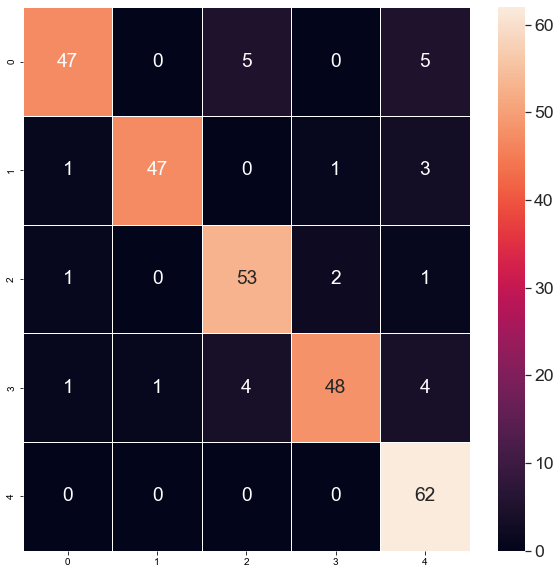

In [22]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

[0.03172282] [0.94068203] [12.515] [0.22329037] [544.91383669] 7.496105706057969
The prediction for this image is:  ['sunny']
The actual label for this image is:  sunny


C:\Users\Vedant Yawalkar\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


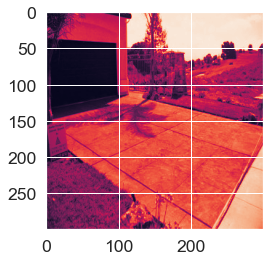

In [23]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = lgb_model.predict(input_img_for_RF)
img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])